In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression,SGDClassifier

In [2]:
fashion_mnist_df = pd.read_csv('datasets/fashion-mnist_train.csv')

In [3]:
#Label is number from 0-9. corresponded to shoe, shock, etc
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#785 = 28p x 28p + 1 label
fashion_mnist_df.shape

(60000, 785)

In [5]:
#get only 30 percent of the entries
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)
fashion_mnist_df.shape

(18000, 785)

In [29]:
#change label into fashions
LOOKUP = {0: 'T-Shirt',
          1: 'Trousers',
          2: 'Pullover',
          3: 'Dress',
          4: 'Coat',
          5: 'Sandal',
          6: 'Shirt',
          7: 'Sneaker',
          8: 'Bag',
          9: 'Ankle boot'}

In [30]:
#to display image
def display_image(features, actual_label):
    print("Actual Label: ", LOOKUP[actual_label])
    plt.imshow(features.reshape(28,28))

In [31]:
#Features are all except first column('label')
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]
Y = fashion_mnist_df['label']

In [32]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,4,0,61,...,83,3,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,9,68,...,78,9,0,0,0,0,0,0,0,0


In [33]:
Y.head()

0    8
1    3
2    8
3    5
4    0
Name: label, dtype: int64

In [34]:
X.loc[5].values[:100]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21,   0,
         0,   0,   0,  14,   7,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       105, 155,  43,   1,  76, 134,  18,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  94, 186, 126,  58, 130, 132,  27,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 149, 149, 139, 187, 140], dtype=int64)

In [35]:
Y.loc[5]

3

Actual Label:  T-Shirt


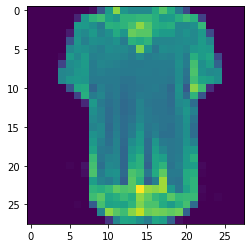

In [36]:
#image at position 4 has label 0 and should be a tshirt
display_image(X.loc[4].values, Y.loc[4])

Actual Label:  Bag


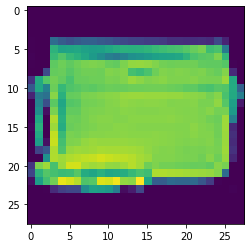

In [37]:
#this is image at entry 0, label is 8 and should be bag
display_image(X.loc[0].values, Y.loc[0])

In [38]:
Y

0        8
1        3
2        8
3        5
4        0
        ..
17995    3
17996    8
17997    6
17998    0
17999    5
Name: label, Length: 18000, dtype: int64

In [40]:
#Original value of intensity is between 0 - 255, to make it easy, normalize it
X=X/255.
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015686,0.000000,0.239216,...,0.325490,0.011765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.266667,...,0.305882,0.035294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#Classify image with logistic Regression. If you want to use complex pitcure, must use neural network
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [42]:
x_train.shape, y_train.shape

((14400, 784), (14400,))

In [43]:
x_test.shape, y_test.shape

((3600, 784), (3600,))

In [54]:
def summarize_classification(y_test,y_pred,avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred, normalize = True)
    num_acc = accuracy_score(y_test, y_pred, normalize = False)
    
    #image output not binary anymore, we need to specify how we average the precission and recall scores
    #if we put average=None, we will get precission and recall for each label separately
    #the number of average depend on the number of entry in each label (weighted)
    prec =  precision_score(y_test, y_pred, average='weighted')
    recall =  recall_score(y_test, y_pred, average='weighted')
    
    print("Test data count: ",len(y_test))
    print("Accuracy count: ", num_acc)
    print("Accuracy score: ",  acc)
    print("Precision score: ", prec)
    print("Recall score: ", recall)
    print()

In [47]:
#Solver not liblinear, but using sag, because it output is multilabel
#multi_class = auto, let the model pick
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

In [50]:
#above take 15 min
y_pred = logistic_model.predict(x_test)
y_pred

array([4, 7, 5, ..., 7, 2, 9], dtype=int64)

In [55]:
#here is the result of logistic regression classes
summarize_classification(y_test,y_pred)

Test data count:  3600
Accuracy count:  3031
Accuracy score:  0.8419444444444445
Precision score:  0.8405173308881934
Recall score:  0.8419444444444445

